This notebook will performing some EDA on the 2024-2025 season. Topics in the EDA will be random. An additional objective of this file would be informing decisions to develop a general script to perform similar EDA on the other seasons in `data`.

In [6]:
import os
import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# importing csv file for 2024-2025 season
file_path = os.path.join(os.getcwd(), 'data', '2024-2025.csv')
data_2024_2025 = pd.read_csv(file_path)

In [20]:
# initial inspection of data 
data_2024_2025.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,E0,16/08/2024,20:00,Man United,Fulham,1,0,H,0,0,...,1.86,2.07,1.83,2.11,1.88,2.11,1.82,2.05,1.90,2.08
1,E0,17/08/2024,12:30,Ipswich,Liverpool,0,2,A,0,0,...,2.05,1.88,2.04,1.90,2.20,2.00,1.99,1.88,2.04,1.93
2,E0,17/08/2024,15:00,Arsenal,Wolves,2,0,H,1,0,...,2.02,1.91,2.00,1.90,2.05,1.93,1.99,1.87,2.02,1.96
3,E0,17/08/2024,15:00,Everton,Brighton,0,3,A,0,1,...,1.87,2.06,1.86,2.07,1.92,2.10,1.83,2.04,1.88,2.11
4,E0,17/08/2024,15:00,Newcastle,Southampton,1,0,H,1,0,...,1.87,2.06,1.88,2.06,1.89,2.10,1.82,2.05,1.89,2.10
5,E0,17/08/2024,15:00,Nott'm Forest,Bournemouth,1,1,D,1,0,...,1.94,1.99,1.94,1.98,2.05,2.00,1.93,1.93,1.96,2.02
6,E0,17/08/2024,17:30,West Ham,Aston Villa,1,2,A,1,1,...,1.83,2.10,1.85,2.09,1.86,2.14,1.82,2.08,1.84,2.18
7,E0,18/08/2024,14:00,Brentford,Crystal Palace,2,1,H,1,0,...,2.07,1.86,2.06,1.88,2.11,1.88,2.05,1.85,2.07,1.92
8,E0,18/08/2024,16:30,Chelsea,Man City,0,2,A,0,1,...,1.94,1.99,1.96,1.97,1.96,2.00,1.90,1.96,1.93,2.07
9,E0,19/08/2024,20:00,Leicester,Tottenham,1,1,D,0,1,...,2.03,1.90,2.02,1.91,2.06,1.92,1.99,1.87,2.03,1.96


## First Focus: Match Data 

Going to start by solely looking at the stats pertaining to what happend during the games rather than any of the data associated with the sports betting. Since we know the games are also all from the Premier League we can ignore the `Div` column.

In [21]:
# subset of data for match stats
match_stat_cols = ['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
                   'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST',
                   'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
match_data = data_2024_2025[match_stat_cols]
match_data.head(10)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/2024,20:00,Man United,Fulham,1,0,H,0,0,D,...,5,2,12,10,7,8,2,3,0,0
1,17/08/2024,12:30,Ipswich,Liverpool,0,2,A,0,0,D,...,2,5,9,18,2,10,3,1,0,0
2,17/08/2024,15:00,Arsenal,Wolves,2,0,H,1,0,H,...,6,3,17,14,8,2,2,2,0,0
3,17/08/2024,15:00,Everton,Brighton,0,3,A,0,1,A,...,1,5,8,8,1,5,1,1,1,0
4,17/08/2024,15:00,Newcastle,Southampton,1,0,H,1,0,H,...,1,4,15,16,3,12,2,4,1,0
5,17/08/2024,15:00,Nott'm Forest,Bournemouth,1,1,D,1,0,H,...,8,4,17,8,2,6,1,3,0,0
6,17/08/2024,17:30,West Ham,Aston Villa,1,2,A,1,1,D,...,3,3,18,11,5,3,1,2,0,0
7,18/08/2024,14:00,Brentford,Crystal Palace,2,1,H,1,0,H,...,5,6,6,15,4,7,1,5,0,0
8,18/08/2024,16:30,Chelsea,Man City,0,2,A,0,1,A,...,3,5,12,9,4,3,1,1,0,0
9,19/08/2024,20:00,Leicester,Tottenham,1,1,D,0,1,A,...,3,7,11,12,2,13,1,1,0,0


In [22]:
# change date column to datetime format
match_data.loc['Date'] = pd.to_datetime(match_data['Date'], format = "%d/%m/%Y")
match_data.head(10)

/var/folders/yr/2pln9r_90574qjgzrqbwvrsr0000gn/T/ipykernel_50660/2095443502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_data.loc['Date'] = pd.to_datetime(match_data['Date'], format = "%d/%m/%Y")


,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/2024,20:00,Man United,Fulham,1,0,H,0,0,D,...,5,2,12,10,7,8,2,3,0,0
1,17/08/2024,12:30,Ipswich,Liverpool,0,2,A,0,0,D,...,2,5,9,18,2,10,3,1,0,0
2,17/08/2024,15:00,Arsenal,Wolves,2,0,H,1,0,H,...,6,3,17,14,8,2,2,2,0,0
3,17/08/2024,15:00,Everton,Brighton,0,3,A,0,1,A,...,1,5,8,8,1,5,1,1,1,0
4,17/08/2024,15:00,Newcastle,Southampton,1,0,H,1,0,H,...,1,4,15,16,3,12,2,4,1,0
5,17/08/2024,15:00,Nott'm Forest,Bournemouth,1,1,D,1,0,H,...,8,4,17,8,2,6,1,3,0,0
6,17/08/2024,17:30,West Ham,Aston Villa,1,2,A,1,1,D,...,3,3,18,11,5,3,1,2,0,0
7,18/08/2024,14:00,Brentford,Crystal Palace,2,1,H,1,0,H,...,5,6,6,15,4,7,1,5,0,0
8,18/08/2024,16:30,Chelsea,Man City,0,2,A,0,1,A,...,3,5,12,9,4,3,1,1,0,0
9,19/08/2024,20:00,Leicester,Tottenham,1,1,D,0,1,A,...,3,7,11,12,2,13,1,1,0,0


In [ ]:
# extract teams in alphabetical order
teams = match_data['HomeTeam'].unique().tolist()
teams = [team for team in teams if pd.notna(team)]
teams.sort()
teams

### TODO: First EDA graphs
1. Focus on stats involving games from the entire league (wins from home teams, comback games)
2. Generate standings for teams after each team players a game
3. Look into stats on team-by-team basis

In [73]:
# find games where a team was down at halftime but won the match
upsets = match_data[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR']].copy()
upsets['Upset'] = np.where((upsets['HTR'] == 'H') & (upsets['FTR'] == 'A') | (upsets['HTR'] == 'A') & (upsets['FTR'] == 'H'), True, False)
upsets = upsets[upsets['Upset'] == True].reset_index(drop = True)
upsets.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Upset
0,14/09/2024,Aston Villa,Everton,3,2,H,1,2,A,True
1,15/09/2024,Wolves,Newcastle,1,2,A,1,0,H,True
2,21/09/2024,Aston Villa,Wolves,3,1,H,0,1,A,True
3,28/09/2024,Everton,Crystal Palace,2,1,H,0,1,A,True
4,06/10/2024,Brighton,Tottenham,3,2,H,0,2,A,True
5,19/10/2024,Man United,Brentford,2,1,H,0,1,A,True
6,19/10/2024,Southampton,Leicester,2,3,A,2,0,H,True
7,02/11/2024,Liverpool,Brighton,2,1,H,0,1,A,True
8,03/11/2024,Tottenham,Aston Villa,4,1,H,0,1,A,True
9,04/11/2024,Fulham,Brentford,2,1,H,0,1,A,True


In [107]:
# find number of upset wins by team
vals = np.array([teams, [0] * len(teams), [0] * len(teams), [0] * len(teams)]).T
team_upsets = pd.DataFrame(data = vals, 
                           index = None, 
                           columns = ['Team', 'Home Upset Wins', 'Away Upset Wins', 'Total Upset Wins'])
team_upsets.set_index('Team', inplace = True)

In [108]:
# change numeric columns to int
cols = ['Home Upset Wins', 'Away Upset Wins', 'Total Upset Wins']
team_upsets[cols] = team_upsets[cols].astype(int)

# count upset wins by team
for index, row in upsets.iterrows():
    if row['FTR'] == 'H':
        team_upsets.loc[row['HomeTeam'], 'Home Upset Wins'] += 1
        team_upsets.loc[row['HomeTeam'], 'Total Upset Wins'] += 1
    elif row['FTR'] == 'A':
        team_upsets.loc[row['AwayTeam'], 'Away Upset Wins'] += 1
        team_upsets.loc[row['AwayTeam'], 'Total Upset Wins'] += 1

# display team upsets
team_upsets = team_upsets[team_upsets['Total Upset Wins'] > 0]
team_upsets.sort_values(by = 'Total Upset Wins', ascending = False, inplace = True)
team_upsets.reset_index(inplace = True)
team_upsets

,Team,Home Upset Wins,Away Upset Wins,Total Upset Wins
0,Fulham,1,4,5
1,Brighton,3,1,4
2,Aston Villa,3,0,3
3,Chelsea,1,2,3
4,Man United,2,1,3
5,Bournemouth,0,2,2
6,Leicester,0,2,2
7,Liverpool,2,0,2
8,Newcastle,0,2,2
9,Everton,1,0,1


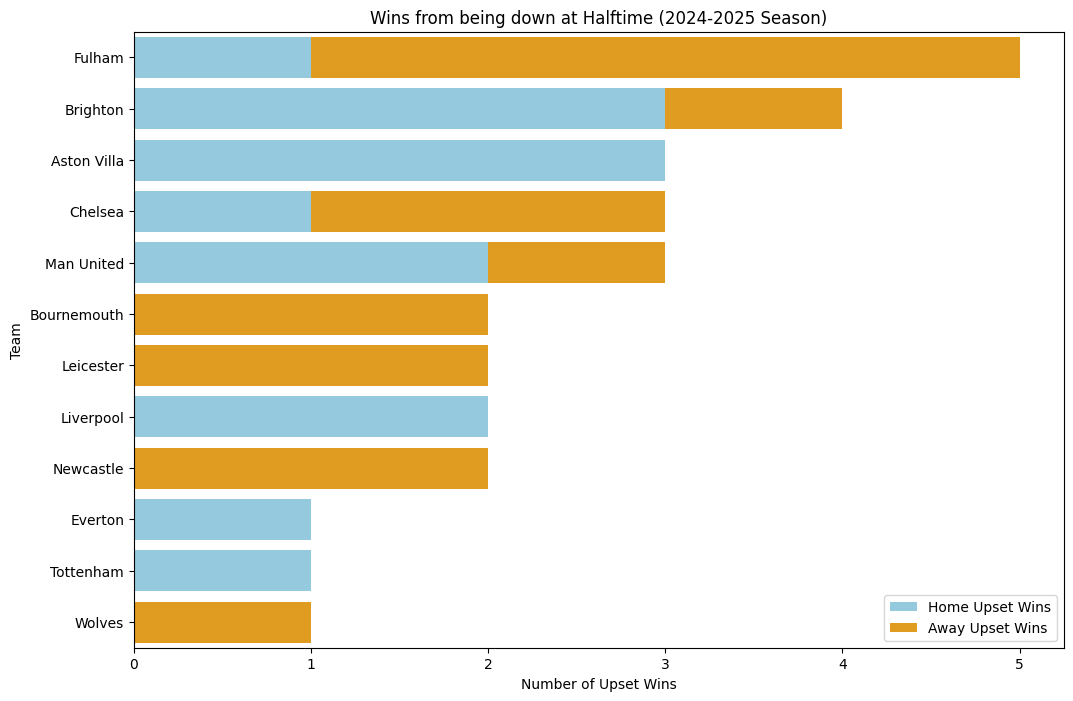

In [ ]:
# display upset wins by team
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Home Upset Wins',
    y='Team',
    data=team_upsets,
    color='skyblue',
    label='Home Upset Wins'
)
sns.barplot(
    x='Away Upset Wins',
    y='Team',
    data=team_upsets,
    color='orange',
    label='Away Upset Wins',
    left=team_upsets['Home Upset Wins']
)
plt.title('Wins after being down at Halftime (2024-2025 Season)')
plt.xlabel('Number of Upset Wins')
plt.legend()
plt.show()